# Подгонка SARIMA (пакет [`sktime`](https://www.sktime.net/en/stable/))

In [2]:
import numpy as np
import pandas as pd

from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.utils.plotting import plot_series

import pandas_datareader.data as web

# тесты диагностики
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) дневные данные по Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (Symbol [`DGS10`](https://fred.stlouisfed.org/series/DGS10)) с 2010-01-01 по 2023-12-31 и создадим датафрейм `y`

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

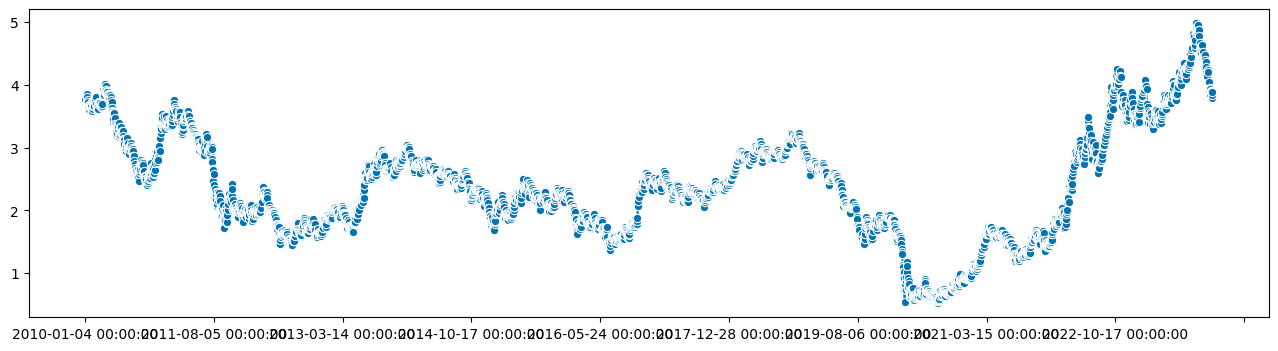

In [9]:
y = web.DataReader(name='DGS10', data_source='fred', start='2010-01-01', end='2023-12-31').dropna()
plot_series(y)

## Подгонка ARIMA заданного порядка без сноса

Подгоним модель ARMA(1,1,1)(1,1,1)_7 без сноса для `y`

Спецификация

$$
	(1-\phi L)(1-\Phi L^7)(1-L)(1-L^l) y_t=(1+\theta L)(1-\Theta L^7)u_t
$$

In [10]:
forecaster = ARIMA(order=(1,1,1), seasonal_order=(1,1,1,7), trend='n')
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3502
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                5242.244
Date:                           Mon, 25 Mar 2024   AIC                         -10474.488
Time:                                   16:57:57   BIC                         -10443.694
Sample:                                        0   HQIC                        -10463.497
                                          - 3502                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8040      0.255      3.158      0.002       0.305       1.303
ma.L1         -0.8158      0.247     -3.297      0.001      -1.301      -0.331
ar.S.L7       -0.0230      0.015     -1.496      0.135      -0.053       0.007
ma.S.L7       -0.9952      0.003   -337.337      0.000      -1.001      -0.989
sigma2         0.0029   5.09e-05     56.673      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               447.36
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Автоматический выбор порядка модели

Выбор порядка по информационным критериям. Выведем только порядок подогнанной модели

In [11]:
forecaster = AutoARIMA(start_p=1, start_q=1, max_p=5, max_q=5, information_criterion='aic', seasonal=True)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'sigma2': 0.0028789457940712575,
 'order': (0, 1, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -10544.0073195076,
 'aicc': -10544.006176323834,
 'bic': -10537.846515586645,
 'hqic': -10541.808634139905}

In [12]:
forecaster = AutoARIMA(start_p=1, start_q=1, max_p=5, max_q=5, information_criterion='bic', seasonal=True)
forecaster.fit(y)
forecaster.get_fitted_params() #['order']

{'sigma2': 0.0028789457940712575,
 'order': (0, 1, 0),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -10544.0073195076,
 'aicc': -10544.006176323834,
 'bic': -10537.846515586645,
 'hqic': -10541.808634139905}